In [1]:
import pandas as pd
import seaborn as sns
from heatmap import corrplot
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import sklearn.metrics as sk_metrics
from sklearn.neural_network import MLPClassifier
from mlxtend.evaluate import mcnemar, mcnemar_table, paired_ttest_5x2cv
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('Dry_Bean_Dataset.csv')

In [3]:
df.Class = df.Class.astype('category').cat.codes

In [4]:
HOW_SCALE = 'minmax'


x = df.drop("Class", axis=1).to_numpy()
y = df["Class"]

if HOW_SCALE == "standard":
    print('standard')
    scaler=StandardScaler()
    X = scaler.fit_transform(x)
elif HOW_SCALE == "minmax":
    scaler = MinMaxScaler()
    X = scaler.fit_transform(x)


Text(0, 0.5, 'Varianza Explicada')

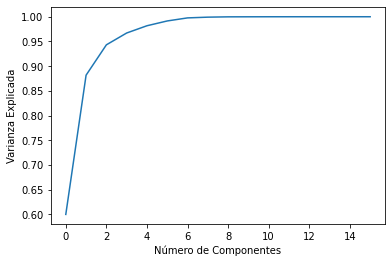

In [5]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')

In [6]:
pca_pre = PCA(n_components=6)
X = pca_pre.fit_transform(X)

In [7]:
print(X)

[[-0.84006957  0.18136539  0.07419889  0.02112779  0.0300454   0.08879611]
 [-1.00657899  0.36674783  0.09856598  0.18634538 -0.07958937  0.18985423]
 [-0.79892633  0.18586464  0.0250513   0.02141885  0.00736202  0.08267297]
 ...
 [-0.19467216 -0.01415031  0.06922135 -0.05485165  0.01515665 -0.05434223]
 [-0.15745284 -0.05241531  0.14184118 -0.02651816  0.03169737 -0.05433887]
 [-0.04699772 -0.12293798 -0.16123949 -0.05570684 -0.02879392 -0.01939286]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9527, 6), (9527,), (4084, 6), (4084,))

In [9]:
skf = StratifiedKFold(n_splits=10)

SVM

In [10]:
param_grid = {     
    'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf']
}



clf = svm.SVC()

type_of_scores = ['balanced_accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']

gridSVC = GridSearchCV(clf, param_grid, scoring='balanced_accuracy', refit=True, verbose=2, n_jobs=-1, cv=skf)

gridSVC.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   32.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='balanced_accuracy', verbose=2)

In [11]:
print(gridSVC.best_estimator_)
print(gridSVC.best_score_)
print(gridSVC.best_params_)
gridBestSVC = gridSVC.best_estimator_




SVC(C=100, gamma=0.1)
0.9356330885521033
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [12]:
gridBestSVC.fit(X_train, y_train)

SVC(C=100, gamma=0.1)

In [13]:
grid_predictionsSVC = gridBestSVC.predict(X_test)
print(sk_metrics.confusion_matrix(y_test,grid_predictionsSVC))
print(sk_metrics.classification_report(y_test,grid_predictionsSVC))
print(sk_metrics.balanced_accuracy_score(y_test,grid_predictionsSVC))
print(sk_metrics.accuracy_score(y_test,grid_predictionsSVC))


[[363   1  27   0   1   2   3]
 [  0 157   0   0   0   0   0]
 [  9   0 461   0  13   2   4]
 [  1   0   0 995   0   9  59]
 [  2   0   8   6 546   0  16]
 [  5   0   0   6   1 579  17]
 [  5   0   0  77  16   6 687]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       397
           1       0.99      1.00      1.00       157
           2       0.93      0.94      0.94       489
           3       0.92      0.94      0.93      1064
           4       0.95      0.94      0.95       578
           5       0.97      0.95      0.96       608
           6       0.87      0.87      0.87       791

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

0.9368155020441439
0.9275220372184133


Multi Layer Perceptron

In [14]:
param_grid = {     
    'hidden_layer_sizes': [2, 4, 10, 20], 
    'activation': ['logistic', 'relu'],
}



clf = MLPClassifier()

gridMLP = GridSearchCV(clf, param_grid, scoring='balanced_accuracy', refit=True, verbose=2, n_jobs=-1, cv=skf)

gridMLP.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   54.5s finished
C:\Users\victo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [2, 4, 10, 20]},
             scoring='balanced_accuracy', verbose=2)

In [15]:
print(gridMLP.best_estimator_)
print(gridMLP.best_score_)
print(gridMLP.best_params_)
gridBestMLP = gridMLP.best_estimator_

MLPClassifier(hidden_layer_sizes=20)
0.9345914209673941
{'activation': 'relu', 'hidden_layer_sizes': 20}


In [16]:
gridBestMLP.fit(X_train, y_train)

C:\Users\victo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=20)

In [17]:
grid_predictionsMLP = gridBestMLP.predict(X_test)
print(sk_metrics.confusion_matrix(y_test,grid_predictionsMLP))
print(sk_metrics.classification_report(y_test,grid_predictionsMLP))
print(sk_metrics.balanced_accuracy_score(y_test,grid_predictionsMLP))
print(sk_metrics.accuracy_score(y_test,grid_predictionsMLP))

[[364   0  28   0   0   4   1]
 [  0 156   1   0   0   0   0]
 [  9   0 459   0  14   2   5]
 [  1   0   0 999   1  10  53]
 [  2   0   9   5 547   0  15]
 [  7   0   1   9   1 578  12]
 [  5   0   1  68  16   6 695]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       397
           1       1.00      0.99      1.00       157
           2       0.92      0.94      0.93       489
           3       0.92      0.94      0.93      1064
           4       0.94      0.95      0.95       578
           5       0.96      0.95      0.96       608
           6       0.89      0.88      0.88       791

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

0.9376752207400882
0.9299706170421156


XGBoost

In [18]:
clf = xgb.XGBClassifier()

param_grid = {                       
    "n_estimators": [50, 200, 350],
    "max_depth": [2,9,14],
    "learning_rate":  [0.1, 0.5, 0.9]
}

gridXGB = RandomizedSearchCV(clf, param_grid, scoring='balanced_accuracy', refit=True, verbose=2, n_jobs=-1, cv=skf)
gridXGB.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.9min finished
C:\Users\victo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[13:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if yo

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=N...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=N

In [19]:
print(gridXGB.best_estimator_)
print(gridXGB.best_score_)
print(gridXGB.best_params_)
gridBestXGB = gridXGB.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.931719038308955
{'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.1}


In [20]:
gridBestXGB.fit(X_train, y_train)

[13:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\victo\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
grid_predictionsXGB = gridBestXGB.predict(X_test)
print(sk_metrics.confusion_matrix(y_test,grid_predictionsXGB))
print(sk_metrics.classification_report(y_test,grid_predictionsXGB))
print(sk_metrics.balanced_accuracy_score(y_test,grid_predictionsXGB))
print(sk_metrics.accuracy_score(y_test,grid_predictionsXGB))

[[364   0  24   0   2   3   4]
 [  0 156   0   0   1   0   0]
 [ 16   0 452   0  13   2   6]
 [  0   0   0 998   1  13  52]
 [  2   0   6   4 548   0  18]
 [  1   0   0  11   0 583  13]
 [  4   0   0  65  15   8 699]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       397
           1       1.00      0.99      1.00       157
           2       0.94      0.92      0.93       489
           3       0.93      0.94      0.93      1064
           4       0.94      0.95      0.95       578
           5       0.96      0.96      0.96       608
           6       0.88      0.88      0.88       791

    accuracy                           0.93      4084
   macro avg       0.94      0.94      0.94      4084
weighted avg       0.93      0.93      0.93      4084

0.9376403493086567
0.930460333006856


KNN

In [22]:
clf = KNeighborsClassifier()

param_grid = {                       
    "n_neighbors": [3, 5, 7, 9, 11, 13, 15, 17, 19],
    "weights": ["uniform", "distance"]
}

gridKNN = GridSearchCV(clf, param_grid, scoring='balanced_accuracy', refit=True, verbose=2, n_jobs=-1, cv=skf)
gridKNN.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 157 out of 180 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             scoring='balanced_accuracy', verbose=2)

In [23]:
print(gridKNN.best_estimator_)
print(gridKNN.best_score_)
print(gridKNN.best_params_)
gridBestKNN = gridKNN.best_estimator_

KNeighborsClassifier(n_neighbors=17, weights='distance')
0.9281737080836949
{'n_neighbors': 17, 'weights': 'distance'}


In [24]:
gridBestKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17, weights='distance')

In [25]:
grid_predictionsKNN = gridBestKNN.predict(X_test)
print(sk_metrics.confusion_matrix(y_test,grid_predictionsKNN))
print(sk_metrics.classification_report(y_test,grid_predictionsKNN))
print(sk_metrics.balanced_accuracy_score(y_test,grid_predictionsKNN))
print(sk_metrics.accuracy_score(y_test,grid_predictionsKNN))

[[353   0  37   0   1   3   3]
 [  0 157   0   0   0   0   0]
 [  6   0 463   0  13   2   5]
 [  0   0   0 996   0  14  54]
 [  2   0   7   4 545   0  20]
 [  3   0   0   6   1 579  19]
 [  3   0   0  77  13   6 692]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       397
           1       1.00      1.00      1.00       157
           2       0.91      0.95      0.93       489
           3       0.92      0.94      0.93      1064
           4       0.95      0.94      0.95       578
           5       0.96      0.95      0.96       608
           6       0.87      0.87      0.87       791

    accuracy                           0.93      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.93      0.93      0.93      4084

0.9345914907594528
0.9267874632713027


McNemar entre SVC y MLP

In [26]:
print(grid_predictionsSVC)
print(grid_predictionsMLP)

tb = mcnemar_table(y_target=y_test, 
                   y_model1=np.array(grid_predictionsSVC), 
                   y_model2=np.array(grid_predictionsMLP))

print(tb)

[2 6 3 ... 2 6 6]
[2 3 3 ... 2 6 6]
[[3768   20]
 [  30  266]]


In [27]:
chi2, p = mcnemar(ary=np.array(tb), corrected=True)
print('chi-squared:', chi2)
print('p-value:', p) # Iguales

chi-squared: 1.62
p-value: 0.20309178757716426


McNemar entre SVC y XGB

In [28]:
tb = mcnemar_table(y_target=y_test, 
                   y_model1=np.array(grid_predictionsSVC), 
                   y_model2=np.array(grid_predictionsXGB))

print(tb)

[[3723   65]
 [  77  219]]


In [29]:
chi2, p = mcnemar(ary=np.array(tb), corrected=True)
print('chi-squared:', chi2)
print('p-value:', p) # Iguales

chi-squared: 0.852112676056338
p-value: 0.3559553582416325


McNemar entre MLP y XGB

In [30]:
tb = mcnemar_table(y_target=y_test, 
                   y_model1=np.array(grid_predictionsMLP), 
                   y_model2=np.array(grid_predictionsXGB))

print(tb)

[[3731   67]
 [  69  217]]


In [31]:
chi2, p = mcnemar(ary=np.array(tb), corrected=True)
print('chi-squared:', chi2)
print('p-value:', p) # Iguales

chi-squared: 0.007352941176470588
p-value: 0.931665716594859


McNemar entre SVC y KNN

In [32]:
tb = mcnemar_table(y_target=y_test, 
                   y_model1=np.array(grid_predictionsSVC), 
                   y_model2=np.array(grid_predictionsKNN))

print(tb)

[[3733   55]
 [  52  244]]


In [33]:
chi2, p = mcnemar(ary=np.array(tb), corrected=True)
print('chi-squared:', chi2)
print('p-value:', p) # Iguales

chi-squared: 0.037383177570093455
p-value: 0.8466869868023941


McNemar entre MLP y KNN

In [34]:
tb = mcnemar_table(y_target=y_test, 
                   y_model1=np.array(grid_predictionsMLP), 
                   y_model2=np.array(grid_predictionsKNN))

print(tb)

[[3733   65]
 [  52  234]]


In [35]:
chi2, p = mcnemar(ary=np.array(tb), corrected=True)
print('chi-squared:', chi2)
print('p-value:', p) # Iguales

chi-squared: 1.2307692307692308
p-value: 0.2672574931543847


McNemar entre XGB y KNN

In [36]:
tb = mcnemar_table(y_target=y_test, 
                   y_model1=np.array(grid_predictionsXGB), 
                   y_model2=np.array(grid_predictionsKNN))

print(tb)

[[3721   79]
 [  64  220]]


In [37]:
chi2, p = mcnemar(ary=np.array(tb), corrected=True)
print('chi-squared:', chi2)
print('p-value:', p) # Iguales

chi-squared: 1.3706293706293706
p-value: 0.24170377856633973
